In [ ]:
#%cd /content/simple-HRNet
#!pip install -r requirements.txt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!git clone https://github.com/stefanopini/simple-HRNet.git

In [ ]:
#%cd /content/drive/My Drive/simple-HRNet

In [ ]:
#!pip install -r requirements.txt

In [ ]:
#%cd /content/drive/My Drive/simple-HRNet/models/detectors/yolo

In [ ]:
#!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

In [ ]:
#%cd /content/drive/My Drive/simple-HRNet/models/detectors

In [ ]:
#! git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

In [ ]:
#%cd /content/drive/My Drive/simple-HRNet/models/detectors/yolo/PyTorch-YOLOv3

In [ ]:
#!pip install -r requirements.txt

In [ ]:
#%cd /content/drive/My Drive/simple-HRNet/models/detectors/yolo/weights

In [ ]:
#!bash download_weights.sh

In [ ]:
%cd '/content/drive/My Drive/Eroom-models-working/simple-HRNet'

/content/drive/.shortcut-targets-by-id/1PnMVdX3wd3Vn1igd3GJJoI6XeRNDStP9/simple-HRNet


In [ ]:
import cv2
from SimpleHRNet import SimpleHRNet

In [ ]:
model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth")

device: 'cpu'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
img=cv2.imread('/content/5.jpg')

In [ ]:
img1=cv2.resize(img, (192,256), cv2.INTER_CUBIC)

In [ ]:
joints = model.predict(img1)

In [ ]:
joints

array([[[ 37.229168  ,  83.388885  ,   0.9708872 ],
        [ 32.583332  ,  88.        ,   0.9543956 ],
        [ 32.583332  ,  78.77778   ,   0.96268463],
        [ 34.90625   ,  94.916664  ,   0.93579364],
        [ 34.90625   ,  71.861115  ,   0.93343925],
        [ 53.489582  , 111.05556   ,   0.9042444 ],
        [ 65.104164  ,  67.25      ,   0.8981129 ],
        [ 88.333336  , 122.583336  ,   0.97204494],
        [104.59375   ,  55.72222   ,   0.95438534],
        [120.854164  , 113.361115  ,   0.9273977 ],
        [116.208336  ,  76.47222   ,   0.9344401 ],
        [123.177086  , 106.44444   ,   0.8384308 ],
        [125.5       ,  78.77778   ,   0.83609676],
        [174.28125   , 120.27778   ,   0.94635046],
        [171.95833   ,  83.388885  ,   0.90198624],
        [218.41667   ,  92.611115  ,   0.8168151 ],
        [220.73958   ,  88.        ,   0.7999709 ]]], dtype=float32)

In [ ]:
#Create an openpose format json output file
import pandas as pd
raw_joints = pd.DataFrame(joints)
raw_joints
#{"version":1.3,"people":[{"person_id":[-1],"pose_keypoints_2d":[],"face_keypoints_2d":[],"hand_left_keypoints_2d":[],"hand_right_keypoints_2d":[],"pose_keypoints_3d":[],"face_keypoints_3d":[],"hand_left_keypoints_3d":[],"hand_right_keypoints_3d":[]}]}

ValueError: ignored

In [ ]:
#FRONT POSE CONDITIONS: STANDING STRAIGHT: Full Body
'''
Keypoints output of simple-HRNet:
0: Nose
1: Left Eye
2: Right Eye
3: Left Ear
4: Right Ear
5: Left Shoulder
6: Right Shoulder
7: Left Elbow
8: Right Elbow
9: Left Wrist
10: Right Wrist
11: Left Hip
12: Right Hip
13: Left Knee
14: Right Knee
15: Left Toe
16: Right Toe

The keypoint detection is accurate, even if the person stands backwards.
'''
 
'''
Conditions:

Very Nice Webpage: https://design.tutsplus.com/articles/human-anatomy-fundamentals-basic-body-proportions--vector-18254

Convention: Y increases as we go upwards. X increases as we go right.
1. No conditions on keypoints between 0 to 4.
######################################################## UPPER BODY
2. x(Left Shoulder) > x(Right Shoulder)
3. x(Left Hip) > x(Right Hip)
##### Condition 2 and 3 focus on removing images with people standing opposite to camera.

4. The Elbow coordinates should not lie between the lines of left shoulder and left hip and right shoulder and right hip. 
5. if (y(Left Wrist) < y(Left Shoulder)) OR (y(Right Wrist) < y(Right Shoulder)): 
        x(Left Wrist) >x(Left Hip) > x(Right Hip) > x(Right Wrist)
6. Lines joining corresponding elbows and shoulders should make an angle in range 10 to 150 degrees with lines joining corresponding shoulders and hips. 
##### Condition 4, 5 and 6 focus on images hand coming in chest way, or wrists crossing the hip.

7. y(Nose/LeftEar/RightEar/LeftEye/RightEye) > y(Left Shoulder/Right Shoulder)
8. y(Left Shoulder/Right Shoulder) > y(Left Hip/ Right Hip)
9. Line joining shoulders and the line joining hips should not make an angle greater than 60 degrees.
10. 0.45 < Distance Btw(Line joining shoulders, Line joining hips)/Distance Btw(Line joining hips, Line joining Ankles) <0.8 
#### Conditions 7 to 10 avoid upside down, head entering the t shirt region and bending positions.
Reference for condition 10: https://design.tutsplus.com/articles/human-anatomy-fundamentals-basic-body-proportions--vector-18254


11. x(Left Shoulder) > x(Right Hip)
12. x(Right Shoulder) < x(Left Hip)
#### Condition 11 and 12 avoids twisting chest.



###################################################### LOWER BODY

13. y(Left Hip/Right Hip) > y(Left Knee/ Right Knee) > y(Left Toe/Right Toe)
#### Condition 13 avoids sitting. Or a HALF/PARTIAL PHOTO

14. x(Left Knee) > x(Right Knee)
15. x(Left Ankle) > x(Right Ankle) #OPTIONAL
16. y(Left Knee) > y(Right Ankle)
17. y(Right Knee) > y(Left Ankle)
#### Conditions 14 to 17 avoid twisting of legs.

18. Line joining Left Hip and Left Ankle should not make an angle greater than 75 degrees with the line joining Right Hip and Right Ankle.
19. Line Joining Left Hip and Left Knee should not make an angle greater than 30 degrees with the line joining Left Hip and Left Ankle.
20. Line Joining Right Hip and Right Knee should not make an angle greater than 30 degrees with the line joining Right Hip and Right Ankle.
####Condition 18 to 20 grant efficient wrapping.


'''


In [ ]:
joints[0][:,1]/288

array([0.57908946, 0.60831404, 0.549865  , 0.6472801 , 0.5011574 ,
       0.7641782 , 0.46219137, 0.86159337, 0.38425925, 0.7934028 ,
       0.54012346, 0.7252122 , 0.549865  , 0.83236885, 0.57908946,
       0.62779707, 0.6375386 ], dtype=float32)

/content/drive/.shortcut-targets-by-id/1PnMVdX3wd3Vn1igd3GJJoI6XeRNDStP9/simple-HRNet
device: 'cpu'


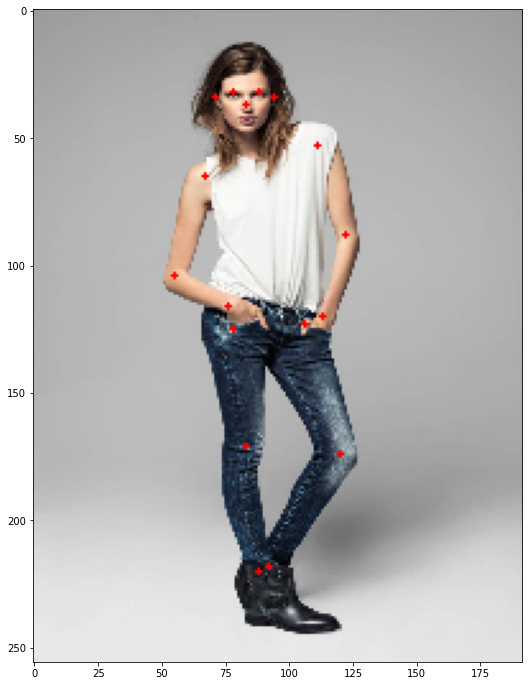

In [ ]:
%cd '/content/drive/My Drive/Eroom-models-working/simple-HRNet'

import cv2
from SimpleHRNet import SimpleHRNet
model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth")
img=cv2.imread('/content/5.jpg')

img1=cv2.resize(img, (192,256), cv2.INTER_CUBIC)

joints = model.predict(img1)

for i in range(joints[0].shape[0]):
  img1 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(0,0,255),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

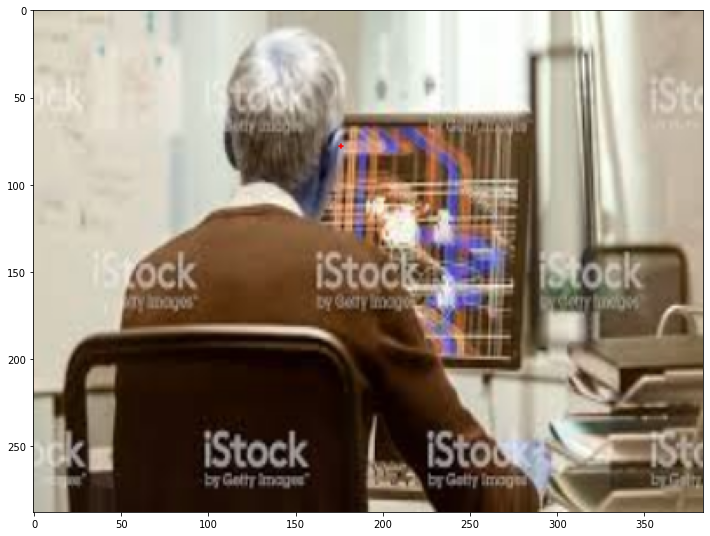

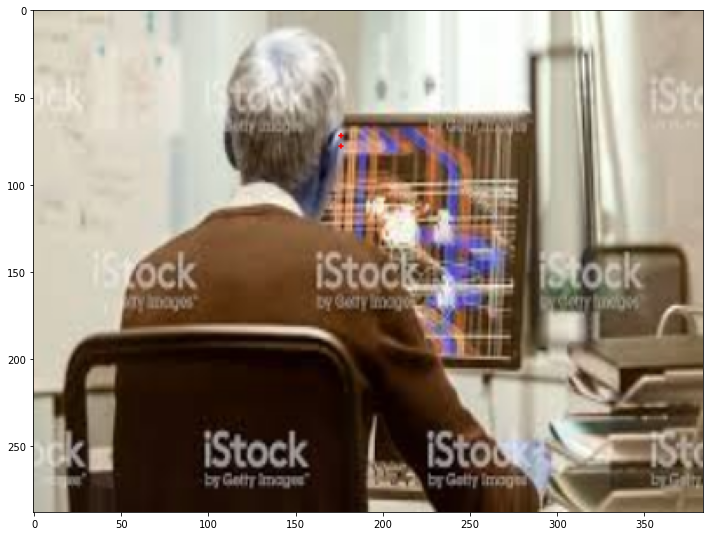

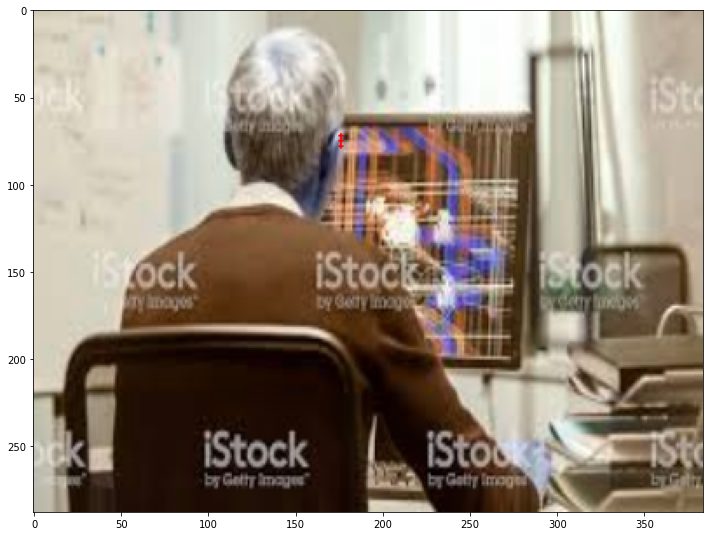

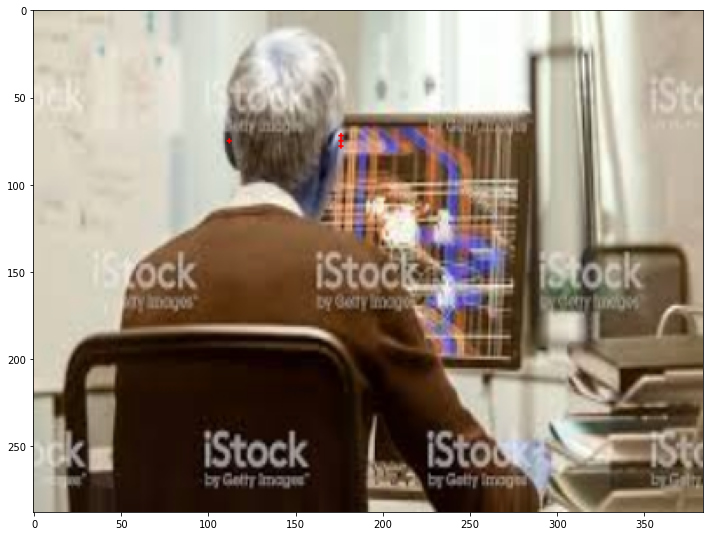

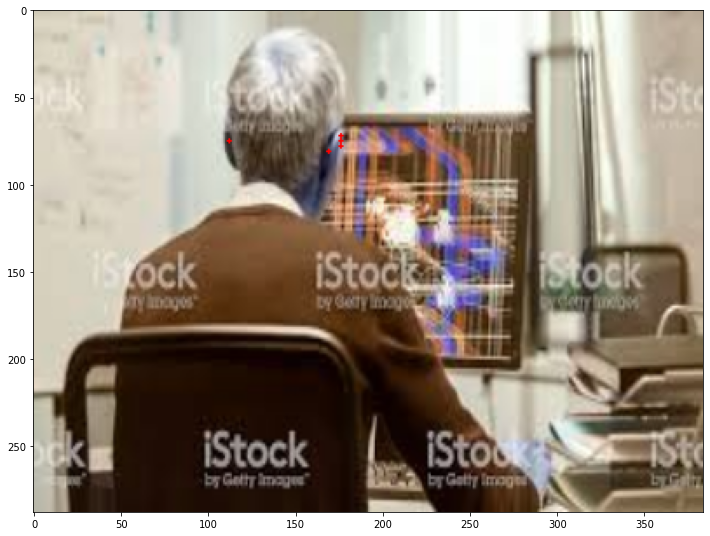

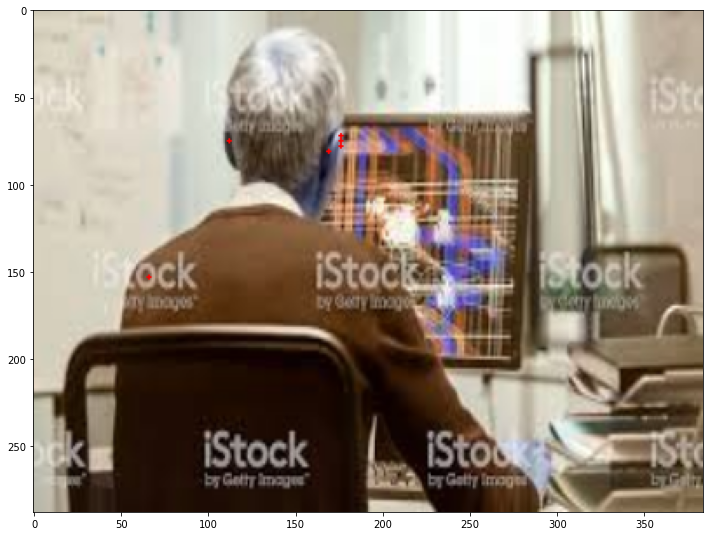

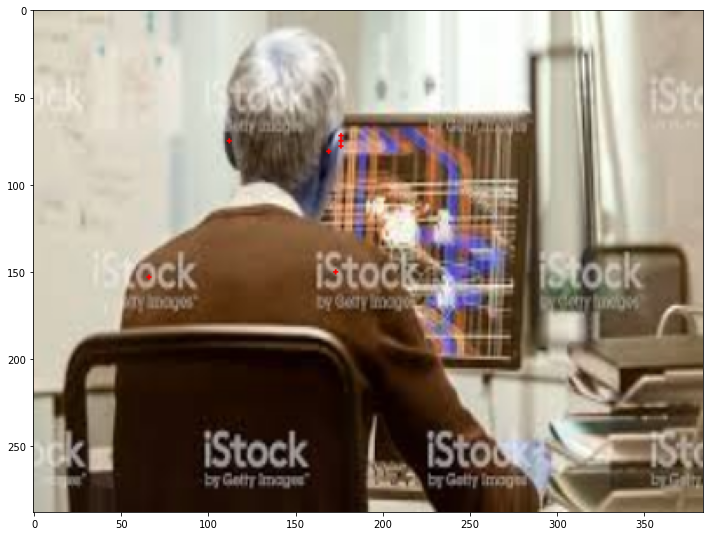

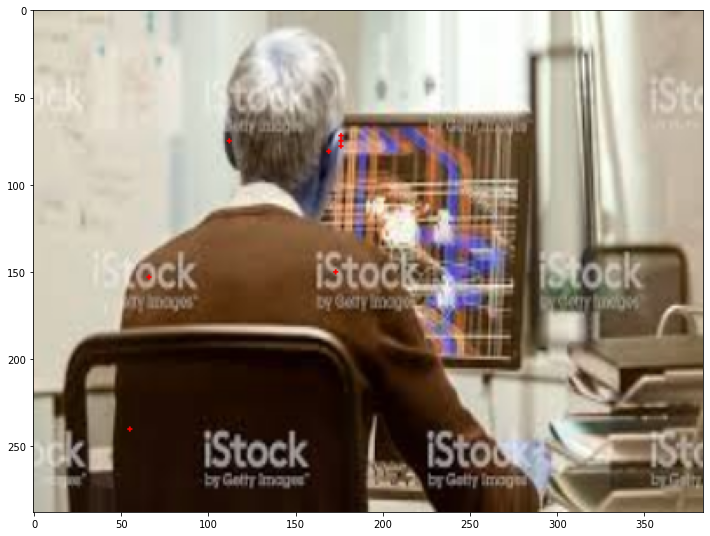

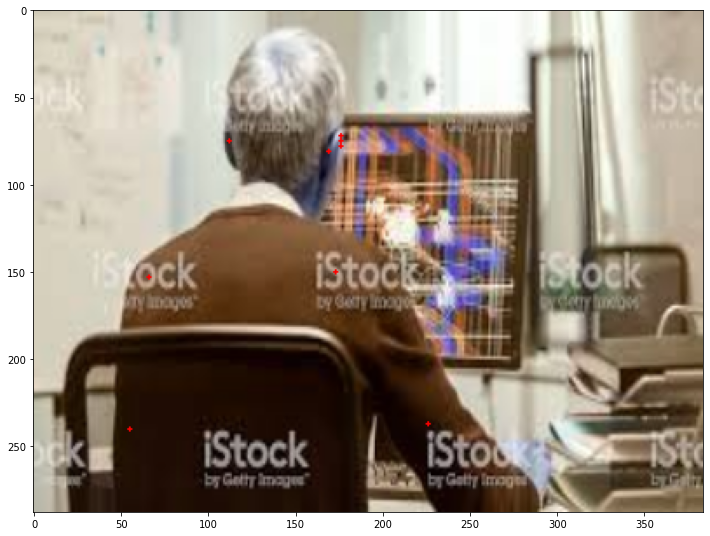

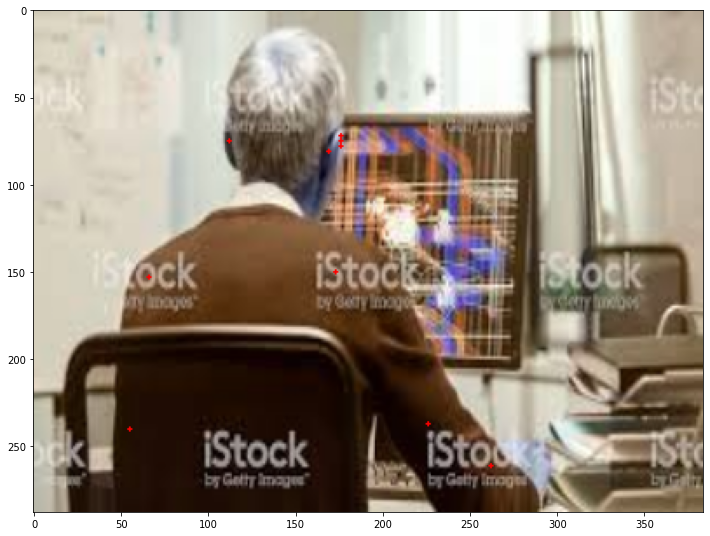

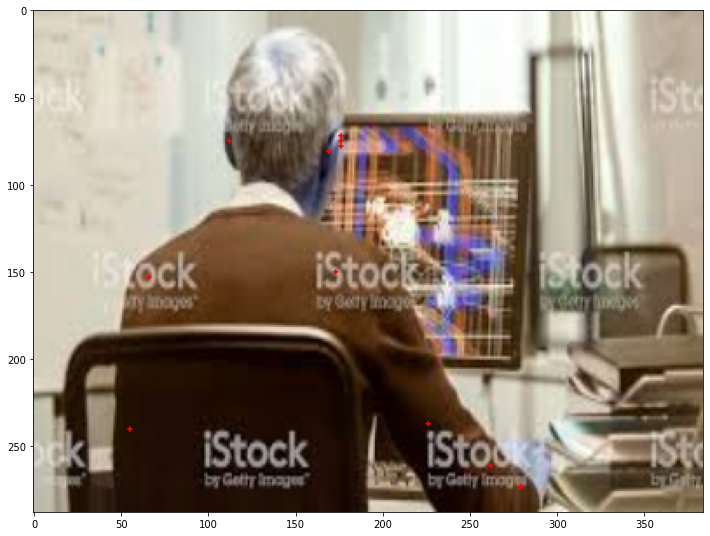

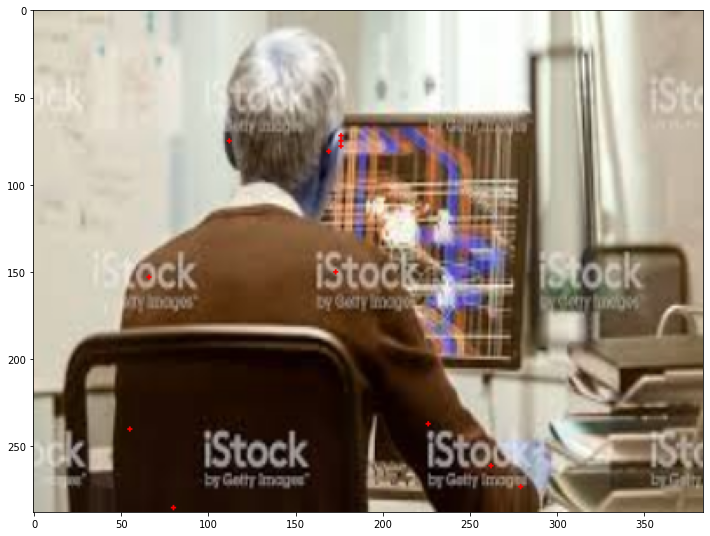

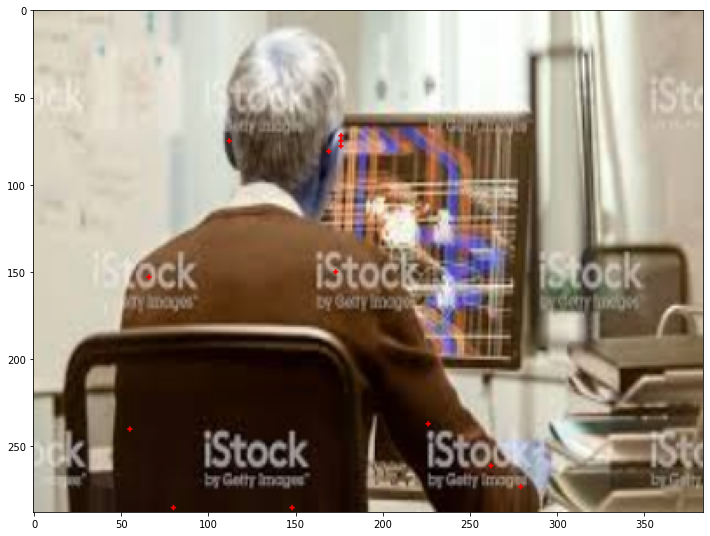

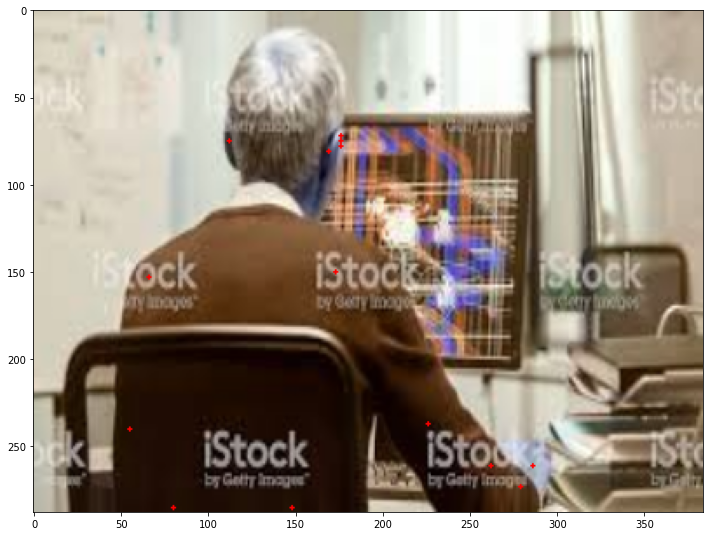

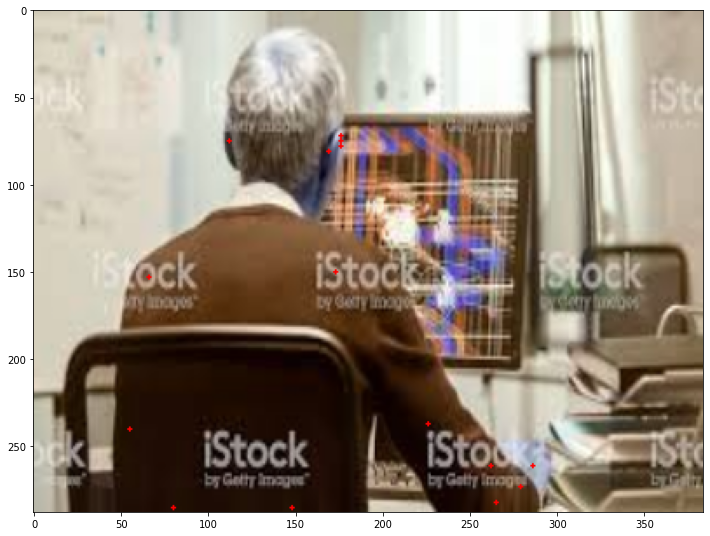

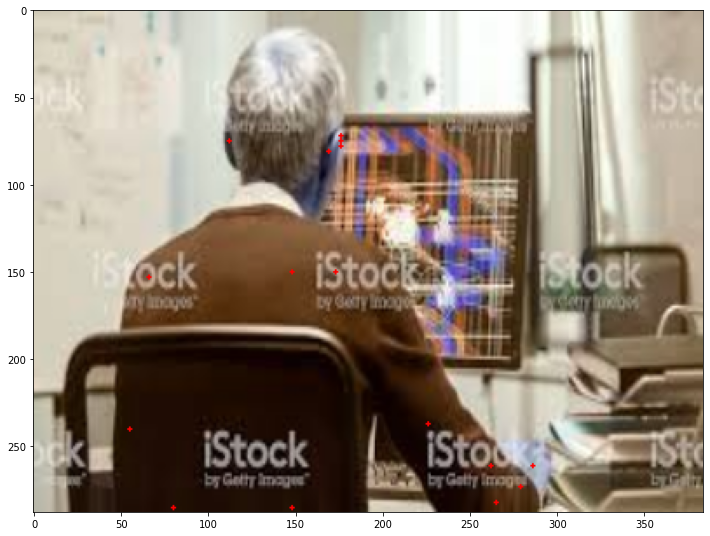

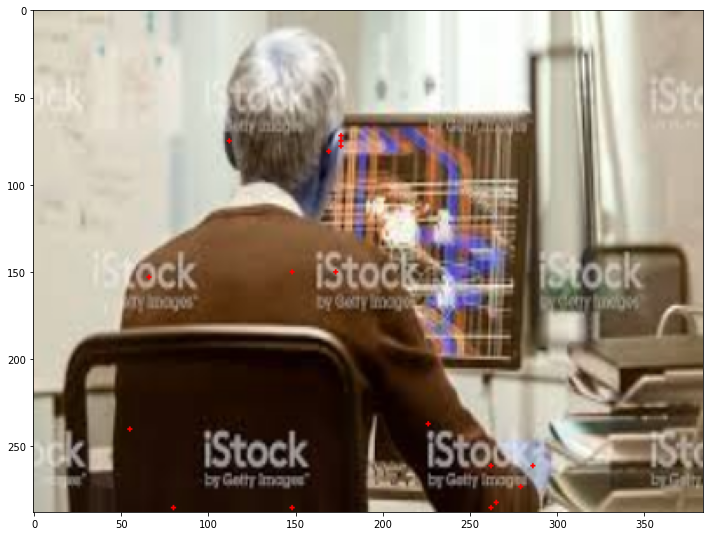

In [ ]:

img=cv2.imread('/content/13.jpg')

img1=cv2.resize(img, (384,288), cv2.INTER_CUBIC)

joints = model.predict(img1)
i=0
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=1
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=2
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=3
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=4
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=5
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=6
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=7
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=8
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=9
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=10
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=11
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=12
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=13
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=14
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=15
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()

i=16
img2 = cv2.circle(img1,(joints[0][i,1].astype(int),joints[0][i,0].astype(int)),0,(255,0,0),2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(img2)
plt.show()
